In [269]:
import numpy as np
from skimage.feature import graycomatrix
import matplotlib.pyplot as plt


In [189]:
def generate_image_from_energy(energy):

    #random grayscale image
    image = np.random.randint(0, 256, size=(50,50), dtype=np.uint8)
    # print(image)

    #calculate glcm
    co_matrix = skimage.feature.graycomatrix(image, [5], [0], levels=256, normed=True, symmetric=True)
    print(co_matrix)
    
    # calculate energy of glcm
    calculated_energy = np.sum(co_matrix**2)
    # print(calculated_energy)
    
    # loop through images until calculated energy equals desired energy
    while abs(calculated_energy - energy) > 1:
        image = np.random.randint(0, 256, size=(100,100), dtype=np.uint8)
        # print(image)
        co_matrix = skimage.feature.graycomatrix(image, [5], [0], levels=256,  normed=True, symmetric=True)
        calculated_energy = np.sum(co_matrix**2)
        print(calculated_energy)

    #return one thats minimum instead of finding exact match
    #can't find one within this tolerance, return one closest to the tolerance range
    #if image is in tolerance range, record the difference between calculated energy and desired energy
    
    return image

In [273]:
def generate_desired_image(desired_energy, desired_homogeneity, desired_correlation, desired_contrast):
    image_size = (50, 50)
    max_pixel_value = 256

    def calculate_criteria(co_matrix):
        energy = np.sum(co_matrix ** 2)
        homogeneity = np.sum(co_matrix / (1 + np.abs(np.arange(max_pixel_value) - np.arange(max_pixel_value)))).sum()
        correlation = (np.sum((np.arange(max_pixel_value) - np.mean(np.arange(max_pixel_value))) * (np.arange(max_pixel_value) - np.mean(np.arange(max_pixel_value)))) * co_matrix) / (np.std(np.arange(max_pixel_value)) * np.std(np.arange(max_pixel_value)))
        contrast = np.sum(((np.arange(max_pixel_value) - np.arange(max_pixel_value)) ** 2) * co_matrix)
        return energy, homogeneity, correlation, contrast

    while True:
        # Generate a random grayscale image
        image = np.random.randint(0, max_pixel_value, size=image_size, dtype=np.uint8)

        # Calculate GLCM
        co_matrix = skimage.feature.graycomatrix(image, [5], [0], levels=max_pixel_value, normed=True, symmetric=True)

        # Calculate criteria values
        energy, homogeneity, correlation, contrast = calculate_criteria(co_matrix)

        # Check if the criteria are within the desired ranges
        if (abs(energy - desired_energy) < 1 and
                abs(homogeneity - desired_homogeneity) < 1 and
                abs(correlation - desired_correlation) < 0.01 and
                abs(contrast - desired_contrast) < 1):
            return image  # Return the generated image if criteria are met

# Set desired criteria values here
desired_energy = 10000
desired_homogeneity = 50
desired_correlation = 0.5
desired_contrast = 500

generated_image = generate_desired_image(desired_energy, desired_homogeneity, desired_correlation, desired_contrast)
print("Generated Image:")
print(generated_image)

[[[[0.        ]]

  [[0.        ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.        ]]

  [[0.        ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.        ]]

  [[0.        ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.00022222]]]


 ...


 [[[0.        ]]

  [[0.        ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.        ]]

  [[0.        ]]

  [[0.        ]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]


 [[[0.        ]]

  [[0.        ]]

  [[0.00022222]]

  ...

  [[0.        ]]

  [[0.        ]]

  [[0.        ]]]]


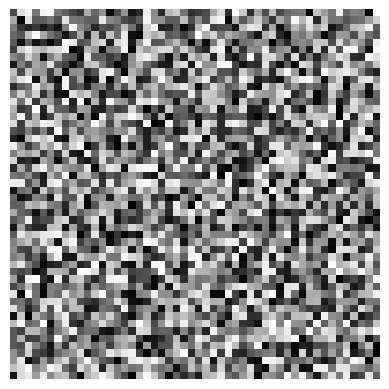

In [268]:
generated_image = generate_image_from_energy(0.9)
plt.imshow(generated_image, cmap='gray')
plt.axis('off')
plt.show()